In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
import os

In [2]:
data = tf.keras.utils.image_dataset_from_directory('original_dataset_sepreate')

Found 1000 files belonging to 2 classes.


In [3]:
data_iterator = data.as_numpy_iterator()

In [4]:
batch = data_iterator.next()

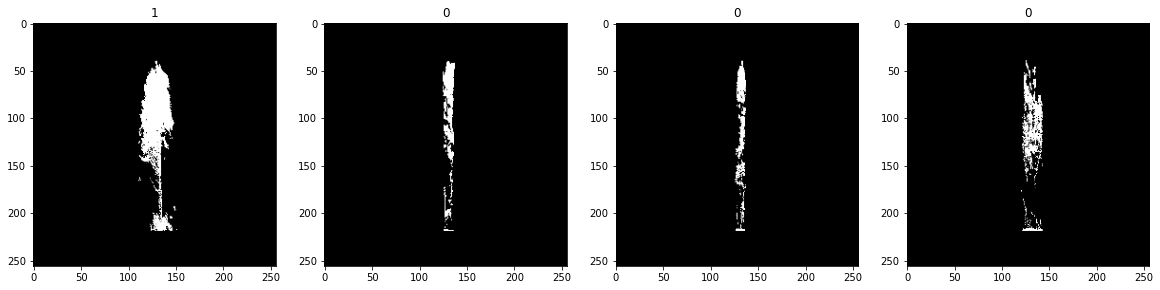

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
data = data.map(lambda x,y: (x/255, y))
data

<MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
train_size = int(len(data)*.7)
test_size = int(len(data)*.3)

In [9]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [10]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

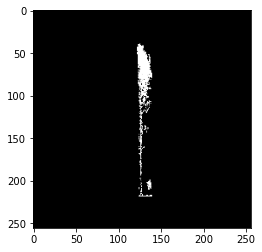

In [12]:
img = cv2.imread('FJI_AC_202.png')
re_size = tf.image.resize(img, (256,256))
plt.imshow(re_size.numpy().astype(int))
plt.show()

In [13]:
os.path

<module 'ntpath' from 'C:\\Users\\91896\\anaconda3\\lib\\ntpath.py'>

In [14]:
import os
loc = r"original_dataset_sepreate/Tree_Images"
os.listdir(loc)

['FJI_AP_101.png',
 'FJI_AP_102.png',
 'FJI_AP_103.png',
 'FJI_AP_108.png',
 'FJI_AP_11.png',
 'FJI_AP_113.png',
 'FJI_AP_114.png',
 'FJI_AP_116.png',
 'FJI_AP_119.png',
 'FJI_AP_12.png',
 'FJI_AP_121.png',
 'FJI_AP_122.png',
 'FJI_AP_123.png',
 'FJI_AP_128.png',
 'FJI_AP_13.png',
 'FJI_AP_131.png',
 'FJI_AP_134.png',
 'FJI_AP_135.png',
 'FJI_AP_140.png',
 'FJI_AP_142.png',
 'FJI_AP_143.png',
 'FJI_AP_145.png',
 'FJI_AP_150.png',
 'FJI_AP_157.png',
 'FJI_AP_16.png',
 'FJI_AP_162.png',
 'FJI_AP_163.png',
 'FJI_AP_165.png',
 'FJI_AP_170.png',
 'FJI_AP_173.png',
 'FJI_AP_176.png',
 'FJI_AP_178.png',
 'FJI_AP_181.png',
 'FJI_AP_182.png',
 'FJI_AP_185.png',
 'FJI_AP_186.png',
 'FJI_AP_187.png',
 'FJI_AP_189.png',
 'FJI_AP_19.png',
 'FJI_AP_194.png',
 'FJI_AP_196.png',
 'FJI_AP_2.png',
 'FJI_AP_20.png',
 'FJI_AP_200.png',
 'FJI_AP_208.png',
 'FJI_AP_209.png',
 'FJI_AP_211.png',
 'FJI_AP_217.png',
 'FJI_AP_222.png',
 'FJI_AP_227.png',
 'FJI_AP_228.png',
 'FJI_AP_229.png',
 'FJI_AP_232.png',
 

In [15]:
features=[]     #list for features
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    resized_f=cv2.resize(f,(256, 256))   #resizing all imgaes to reduce computation and also give each image a dimension
    features.append(resized_f)
    

print(features)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [16]:
import numpy as np
np.array(features).shape    #np.array used to convert features into array



(500, 256, 256, 3)

In [17]:
label = [2]*500

In [19]:
X=np.array(features)
Y=np.array(label)
X = X.reshape(500,196608)

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)
#print(xtrain,xtest,ytrain,ytest)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2

# Decision Tree is Overfit model for this Data set

In [21]:
from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier() 

In [22]:
dmodel.fit(xtrain,ytrain)     

DecisionTreeClassifier()

In [23]:
dmodel.score(xtrain,ytrain)  

1.0

In [24]:
dmodel.score(xtest,ytest)  

1.0

In [25]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
rmodel.score(xtrain,ytrain)

1.0

In [27]:
rmodel.score(xtest,ytest)

1.0

In [31]:
from sklearn.naive_bayes import GaussianNB 
gmodel=GaussianNB()

In [32]:
gmodel.fit(xtrain,ytrain) 

GaussianNB()

In [33]:
gmodel.score(xtrain,ytrain)

1.0

In [34]:
gmodel.score(xtest,ytest)

1.0